In [1]:
import pandas as pd
import numpy as np
import plotly
plotly.tools.set_credentials_file(username='sherry9788', api_key='Cw40WD6lRwalI8wtPd72')
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.shape

(16719, 16)

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## Variables

In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [7]:
df2 = df.copy().dropna()
df2.shape
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [8]:
df2.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


## Name

In [9]:
df.Name.nunique()

11562

Not every one is unique, check to see what the duplicates look like

In [10]:
df[df.Name==df[df.Name.duplicated()].Name.values[0]]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M
165,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.81,2.19,0.00,0.47,5.48,97.0,14.0,7.9,764.0,Rockstar North,M
1730,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.39,0.69,0.00,0.09,1.17,96.0,57.0,7.9,3756.0,Rockstar North,M


In [11]:
df2.Platform.unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

These are the games that have versions across multiple platforms.

## Platform

In [12]:
data = [go.Histogram(x=df2.Platform)]
py.iplot(data, filename='Platform Frequency')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~sherry9788/0 or inside your plot.ly account where it is named 'Platform Frequency'


In [13]:
platform = df2.Platform.value_counts()
print(platform)

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: Platform, dtype: int64


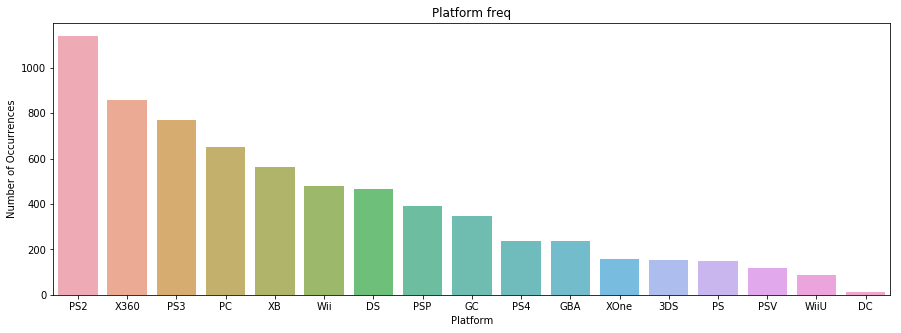

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(platform.index, platform.values, alpha=0.8)
plt.title('Platform freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Platform')
plt.show()

## Genre

In [15]:
df2.Genre.unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [16]:
genre = df2.Genre.value_counts()
print(genre)

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64


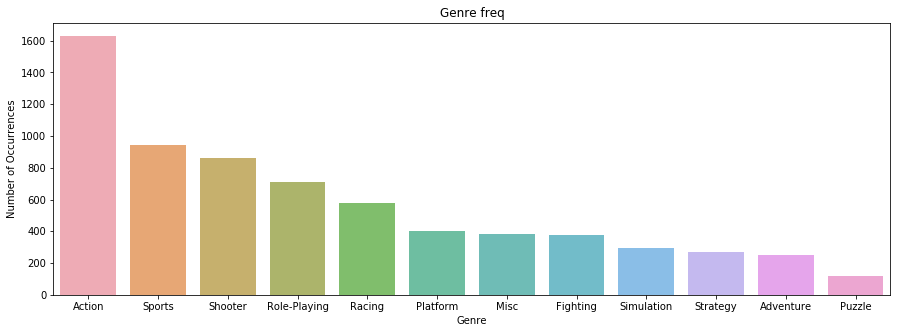

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(genre.index, genre.values, alpha=0.8)
plt.title('Genre freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Genre')
plt.show()

## Publisher

In [18]:
df2.Publisher.unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'SquareSoft',
       'GT Interactive', 'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', '505 Games', 'Capcom',
       'Warner Bros. Interactive Entertainment', 'Universal Interactive',
       'RedOctane', 'Atari', 'Eidos Interactive', 'Namco Bandai Games',
       'Vivendi Games', 'MTV Games', 'Sega', 'THQ',
       'Disney Interactive Studios', 'Acclaim Entertainment',
       'Midway Games', 'Deep Silver', 'NCSoft', 'Tecmo Koei',
       'Valve Software', 'Infogrames', 'Mindscape', 'Valve',
       'Hello Games', 'Global Star', 'Gotham Games',
       'Crave Entertainment', 'Hasbro Interactive', 'Codemasters',
       'TDK Mediactive', 'Zoo Games', 'Sony Online Entertainment', 'RTL',
       'D3Publisher', 'Black Label Games', 'Sou

In [19]:
len(df2.Publisher.unique())

262

In [20]:
df2.Publisher.value_counts().iloc[:40]

Electronic Arts                           944
Ubisoft                                   496
Activision                                492
Sony Computer Entertainment               316
THQ                                       307
Nintendo                                  291
Sega                                      284
Take-Two Interactive                      273
Konami Digital Entertainment              244
Namco Bandai Games                        239
Capcom                                    197
Atari                                     176
Microsoft Game Studios                    141
Tecmo Koei                                137
Square Enix                               134
Warner Bros. Interactive Entertainment    130
Eidos Interactive                         123
Vivendi Games                             113
Codemasters                               111
Midway Games                              103
505 Games                                  80
Deep Silver                       

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

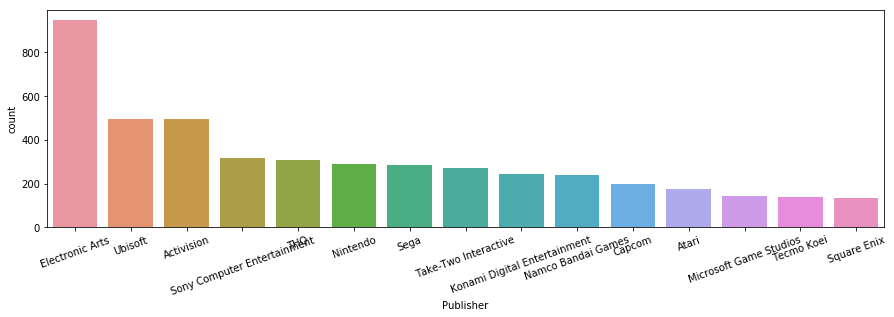

In [21]:
plt.figure(figsize=(15, 4))
sns.countplot(df2.Publisher, order=df2.Publisher.value_counts().iloc[:15].index)
plt.xticks(rotation=20)

## Year of Release

In [22]:
np.sort(df2.Year_of_Release.unique())

array([1985., 1988., 1992., 1994., 1996., 1997., 1998., 1999., 2000.,
       2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009.,
       2010., 2011., 2012., 2013., 2014., 2015., 2016.])

In [23]:
df2.Year_of_Release = df2.Year_of_Release.astype(int)

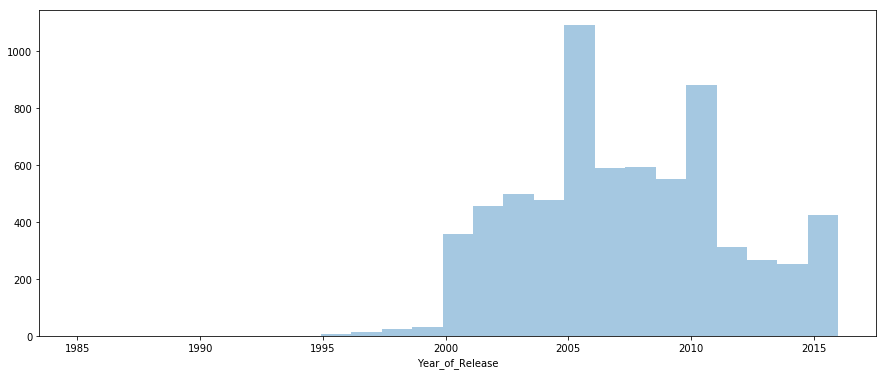

In [24]:
plt.figure(figsize=(15, 6))
sns.distplot(df2.Year_of_Release, kde = False, bins=df2.Year_of_Release.nunique())

## Critic_Score, Critic_Count, User_Score, User_Count

In [25]:
df2.User_Score.unique()

array(['8', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2',
       '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9',
       '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3', '7.6',
       '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1', '6.7',
       '5.4', '4', '9.3', '6.2', '4.2', '6', '4.9', '3.7', '4.1', '5.8',
       '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1', '2.9', '5.2',
       '3.3', '4.5', '5.1', '3.5', '2.5', '1.9', '2.2', '2', '9.5', '4.7',
       '2.1', '3.6', '1.8', '3.8', '3', '9.6', '2.8', '1.7', '2.7', '2.4',
       '1.5', '1.2', '2.3', '0.5', '0.6', '0.9', '1', '1.4', '1.3', '0.7'],
      dtype=object)

In [26]:
df2.User_Score = df2.User_Score.astype(float)
print(df2.User_Score.max())
print(df2.User_Score.min())

9.6
0.5


In [27]:
df2.User_Count = df2.User_Count.astype(int)
print(df2.User_Count.max())
print(df2.User_Count.min())

10665
4


In [28]:
df2.Critic_Score = df2.Critic_Score.astype(float)
print(df2.Critic_Score.max())
print(df2.Critic_Score.min())

98.0
13.0


In [29]:
df2.Critic_Count = df2.Critic_Count.astype(int)
print(df2.Critic_Count.max())
print(df2.Critic_Count.min())

113
3


/Users/sherrywang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



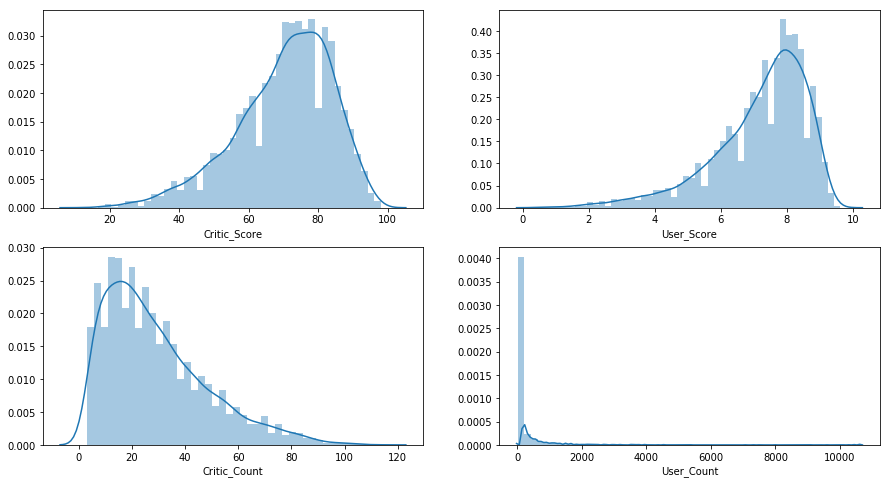

In [30]:
plt.figure(figsize=(15, 8))
plt.subplot(2,2,1)
sns.distplot(df2.Critic_Score)

plt.subplot(2,2,2)
sns.distplot(df2.User_Score)

plt.subplot(2,2,3)
sns.distplot(df2.Critic_Count)

plt.subplot(2,2,4)
sns.distplot(df2.User_Count)

## Developer

In [31]:
df2.Developer.unique()

array(['Nintendo', 'Good Science Studio', 'Rockstar North', ...,
       'Big Red Software', 'Fluid Studios', 'Atomic Games'], dtype=object)

In [32]:
len(df2.Developer.unique())

1289

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

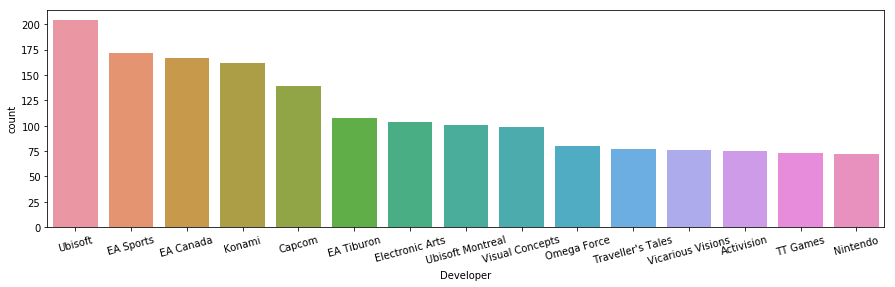

In [33]:
plt.figure(figsize=(15, 4))
sns.countplot(df.Developer, order=df.Developer.value_counts().iloc[:15].index)
plt.xticks(rotation=15)

In [34]:
sony_studio = df2.loc[(df2.Publisher.isna()==False) & (df2.Publisher.str.contains('Sony')), 'Developer'].value_counts()
print(sony_studio[np.arange(10)])

SCEA San Diego Studios    25
SCE Japan Studio          17
SCEA                      14
989 Sports                12
SCEE London Studio        12
Namco                     12
Naughty Dog               10
Zipper Interactive         8
Clap Hanz                  7
SCEE                       7
Name: Developer, dtype: int64


In [35]:
len(sony_studio)

124

## Rating

In [36]:
np.sort(df2.Rating.unique())

array(['AO', 'E', 'E10+', 'K-A', 'M', 'RP', 'T'], dtype=object)

In [37]:
rating = df2.Rating.value_counts()
print(rating)

T       2377
E       2082
M       1433
E10+     930
AO         1
RP         1
K-A        1
Name: Rating, dtype: int64


In [38]:
df2.loc[df2.Rating=='K-A', 'Rating'] = 'E' 

In [39]:
rating = df2.Rating.value_counts()
print(rating)

T       2377
E       2083
M       1433
E10+     930
AO         1
RP         1
Name: Rating, dtype: int64


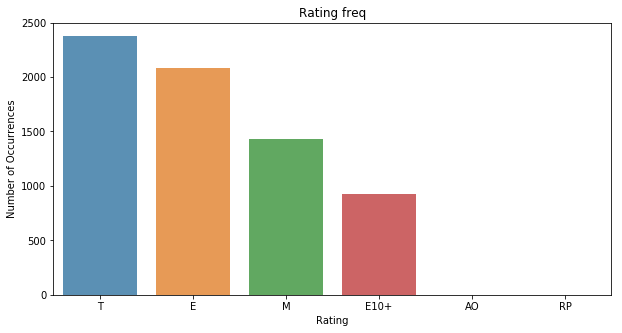

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(rating.index, rating.values, alpha=0.8)
plt.title('Rating freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Rating')
plt.show()

## NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales

Game sales in North America (in millions of units)

In [41]:
((df.Global_Sales>=df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)*0.99) 
& (df.Global_Sales<=df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)*1.01)).head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

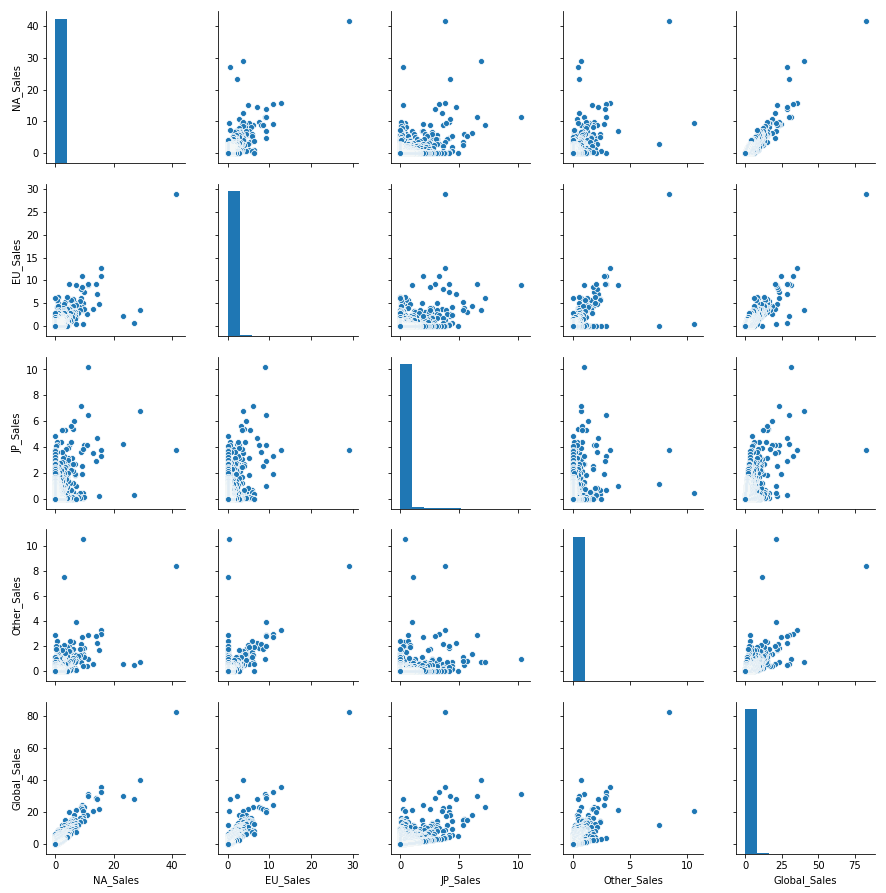

In [42]:
sns.pairplot(df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])

## Exploratory Analysis of the Data

In [64]:
plat_freq = pd.crosstab(index=df2.Year_of_Release, columns=df2.Platform)
plat_freq

Platform,3DS,DC,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
Year_of_Release,,,,,,,,,,,,,,,,,
1985,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1988,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1992,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,2,5,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,1,12,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,3,22,0,0,0,0,0,0,0,0,0,0
1999,0,3,0,0,0,2,25,0,0,0,0,0,0,0,0,0,0
2000,0,7,0,0,0,4,50,40,0,0,0,0,0,0,0,1,0


<Figure size 1080x576 with 0 Axes>

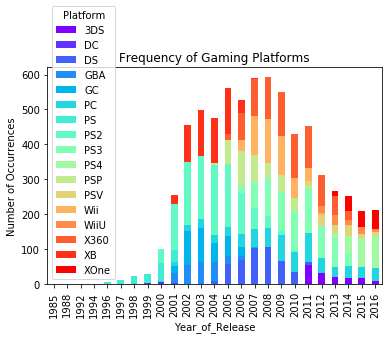

In [66]:
plt.figure(figsize=(15,8))
plat_freq.plot(kind='bar', stacked=True, colormap='rainbow')
plt.title('Frequency of Gaming Platforms')
plt.ylabel('Number of Occurrences')
plt.show()

In [56]:
plat_pivot = pd.pivot_table(df2, index='Year_of_Release', columns='Platform', values='Global_Sales', aggfunc=np.sum)
plat_pivot

Platform,3DS,DC,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
Year_of_Release,,,,,,,,,,,,,,,,,
1985,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,NaN,NaN,NaN,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,NaN,2.62,17.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,4.12,30.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,0.10,43.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,2.04,NaN,NaN,NaN,0.11,49.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,1.98,NaN,NaN,NaN,3.18,45.63,29.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN


#### Market Share

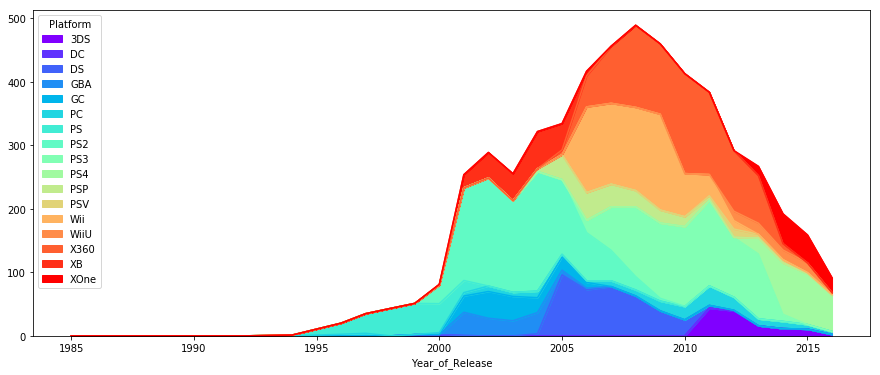

In [62]:
plat_pivot.plot(kind='area', stacked=True, colormap='rainbow', figsize=(15,6))

In [84]:
plat_max = pd.DataFrame({'Platform':plat_pivot.idxmax(axis=1), 'Global_Sales':plat_pivot.max(axis=1)})
plat_max

,Platform,Global_Sales
Year_of_Release,,
1985,PC,0.03
1988,PC,0.03
1992,PC,0.03
1994,PS,1.27
1996,PS,17.48
1997,PS,30.89
1998,PS,43.08
1999,PS,49.02
2000,PS,45.63


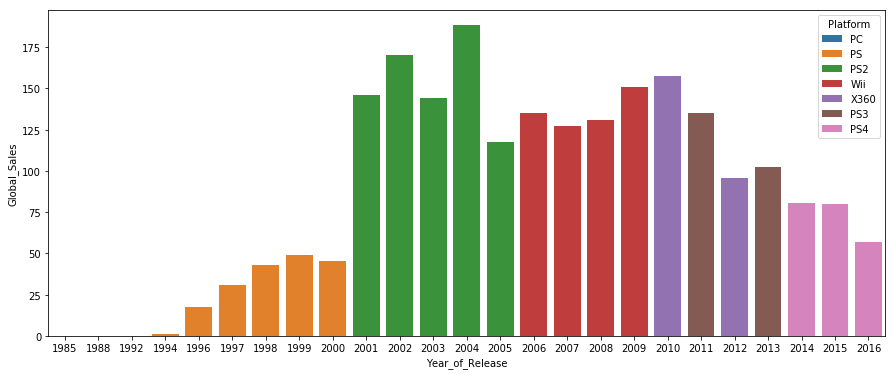

In [100]:
plat_max['Year_of_Release'] = plat_max.index
plt.figure(figsize=(15, 6))
sns.barplot(data=plat_max, x='Year_of_Release', y='Global_Sales', hue='Platform', dodge=False)
plt.show()

### 8th GENERATION CONSOLE WAR: PS4 vs XBOXONE vs WiiU

In [104]:
gen8 = df2[(df2.Platform == 'Wii') | (df2.Platform == 'PS3') | (df2.Platform == 'X360')]
gen8.shape

(2106, 16)

In [113]:
gen8_freq = pd.crosstab(index=gen8.Year_of_Release, columns=gen8.Platform)
gen8_freq

Platform,PS3,Wii,X360
Year_of_Release,,,
2005,0,0,16
2006,19,33,76
2007,76,113,105
2008,109,126,120
2009,112,110,126
2010,115,56,125
2011,127,36,120
2012,93,5,90
2013,82,0,54


<Figure size 1080x576 with 0 Axes>

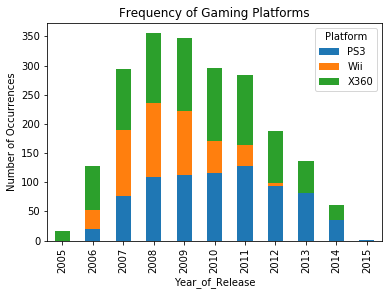

In [114]:
plt.figure(figsize=(15,8))
gen8_freq.plot(kind='bar', stacked=True)
plt.title('Frequency of Gaming Platforms')
plt.ylabel('Number of Occurrences')
plt.show()

In [105]:
gen8_pivot = pd.pivot_table(gen8, index='Year_of_Release', columns='Platform', values='Global_Sales', aggfunc=np.sum)
gen8_pivot

Platform,PS3,Wii,X360
Year_of_Release,,,
2005,NaN,NaN,7.66
2006,19.61,134.97,48.92
2007,68.49,127.33,89.41
2008,109.80,131.05,129.17
2009,118.48,151.02,110.71
2010,125.41,67.93,157.37
2011,134.84,33.45,129.56
2012,94.24,13.23,95.59
2013,102.15,NaN,74.79


Text(0,0.5,'Global_Sales')

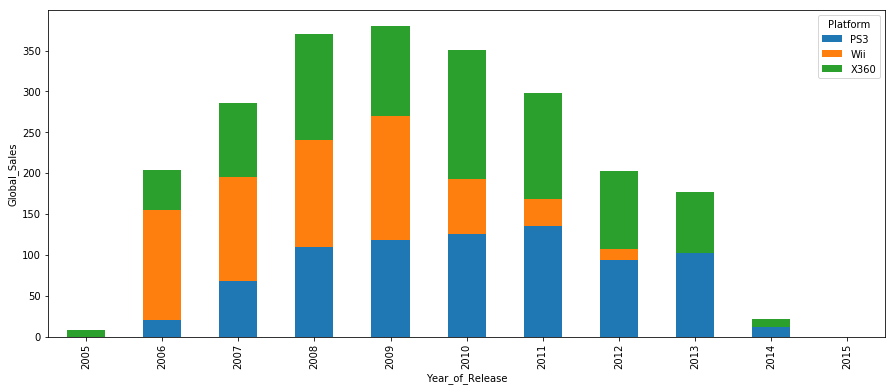

In [116]:
gen8_pivot.plot.bar(figsize=(15,6), stacked=True)
plt.ylabel('Global_Sales')